<a href="https://www.kaggle.com/code/mosesmoncy/abalone-age-prediction?scriptVersionId=128041917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Abalone is a type of marine snail that is commonly consumed as a seafood delicacy. The age of an abalone can be determined by counting the number of rings on its shell. However, this method is time-consuming and requires expertise. In this project, we will explore how machine learning can be used to predict the age of an abalone based on various physical characteristics.

Abalone age prediction is the process of using machine learning algorithms to predict the age of an abalone, a type of marine snail commonly consumed as a seafood delicacy, based on various physical characteristics such as length, diameter, and weight. Traditionally, the age of an abalone is determined by counting the number of rings on its shell, which is a time-consuming and expertise-dependent process. Using machine learning algorithms, we can predict the age of an abalone more efficiently and accurately, which can be useful in the seafood industry for managing stocks and determining market value.

Model is created to predict the 'age' of the Abalone using Regression Models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
a=pd.read_csv('/kaggle/input/abalone-dataset/abalone.csv')
a

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# read first five data

a.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
# read last five data

a.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
a.shape

(4177, 9)

In [7]:
a.describe

<bound method NDFrame.describe of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1

In [8]:
a.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [9]:
a.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [10]:
a['age'] = a['Rings']+1.5
a.drop('Rings', axis = 1, inplace = True)

In [11]:
a

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


Data Visualisation

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


<AxesSubplot:>

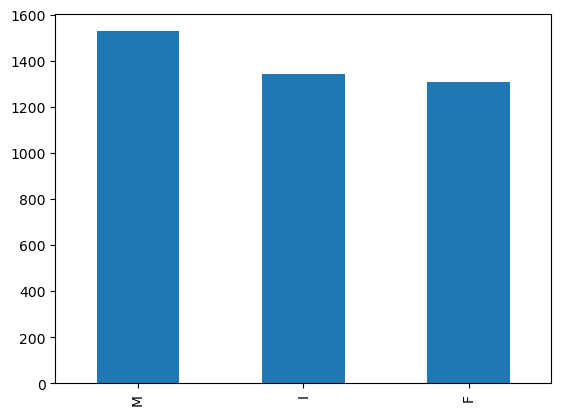

In [13]:
# plot a bar Chart for 'sex distribution'

a_sex = a['Sex'].value_counts()
print(a_sex)
a['Sex'].value_counts().plot(kind='bar')

Boxplots to look for outliers

<AxesSubplot:ylabel='age'>

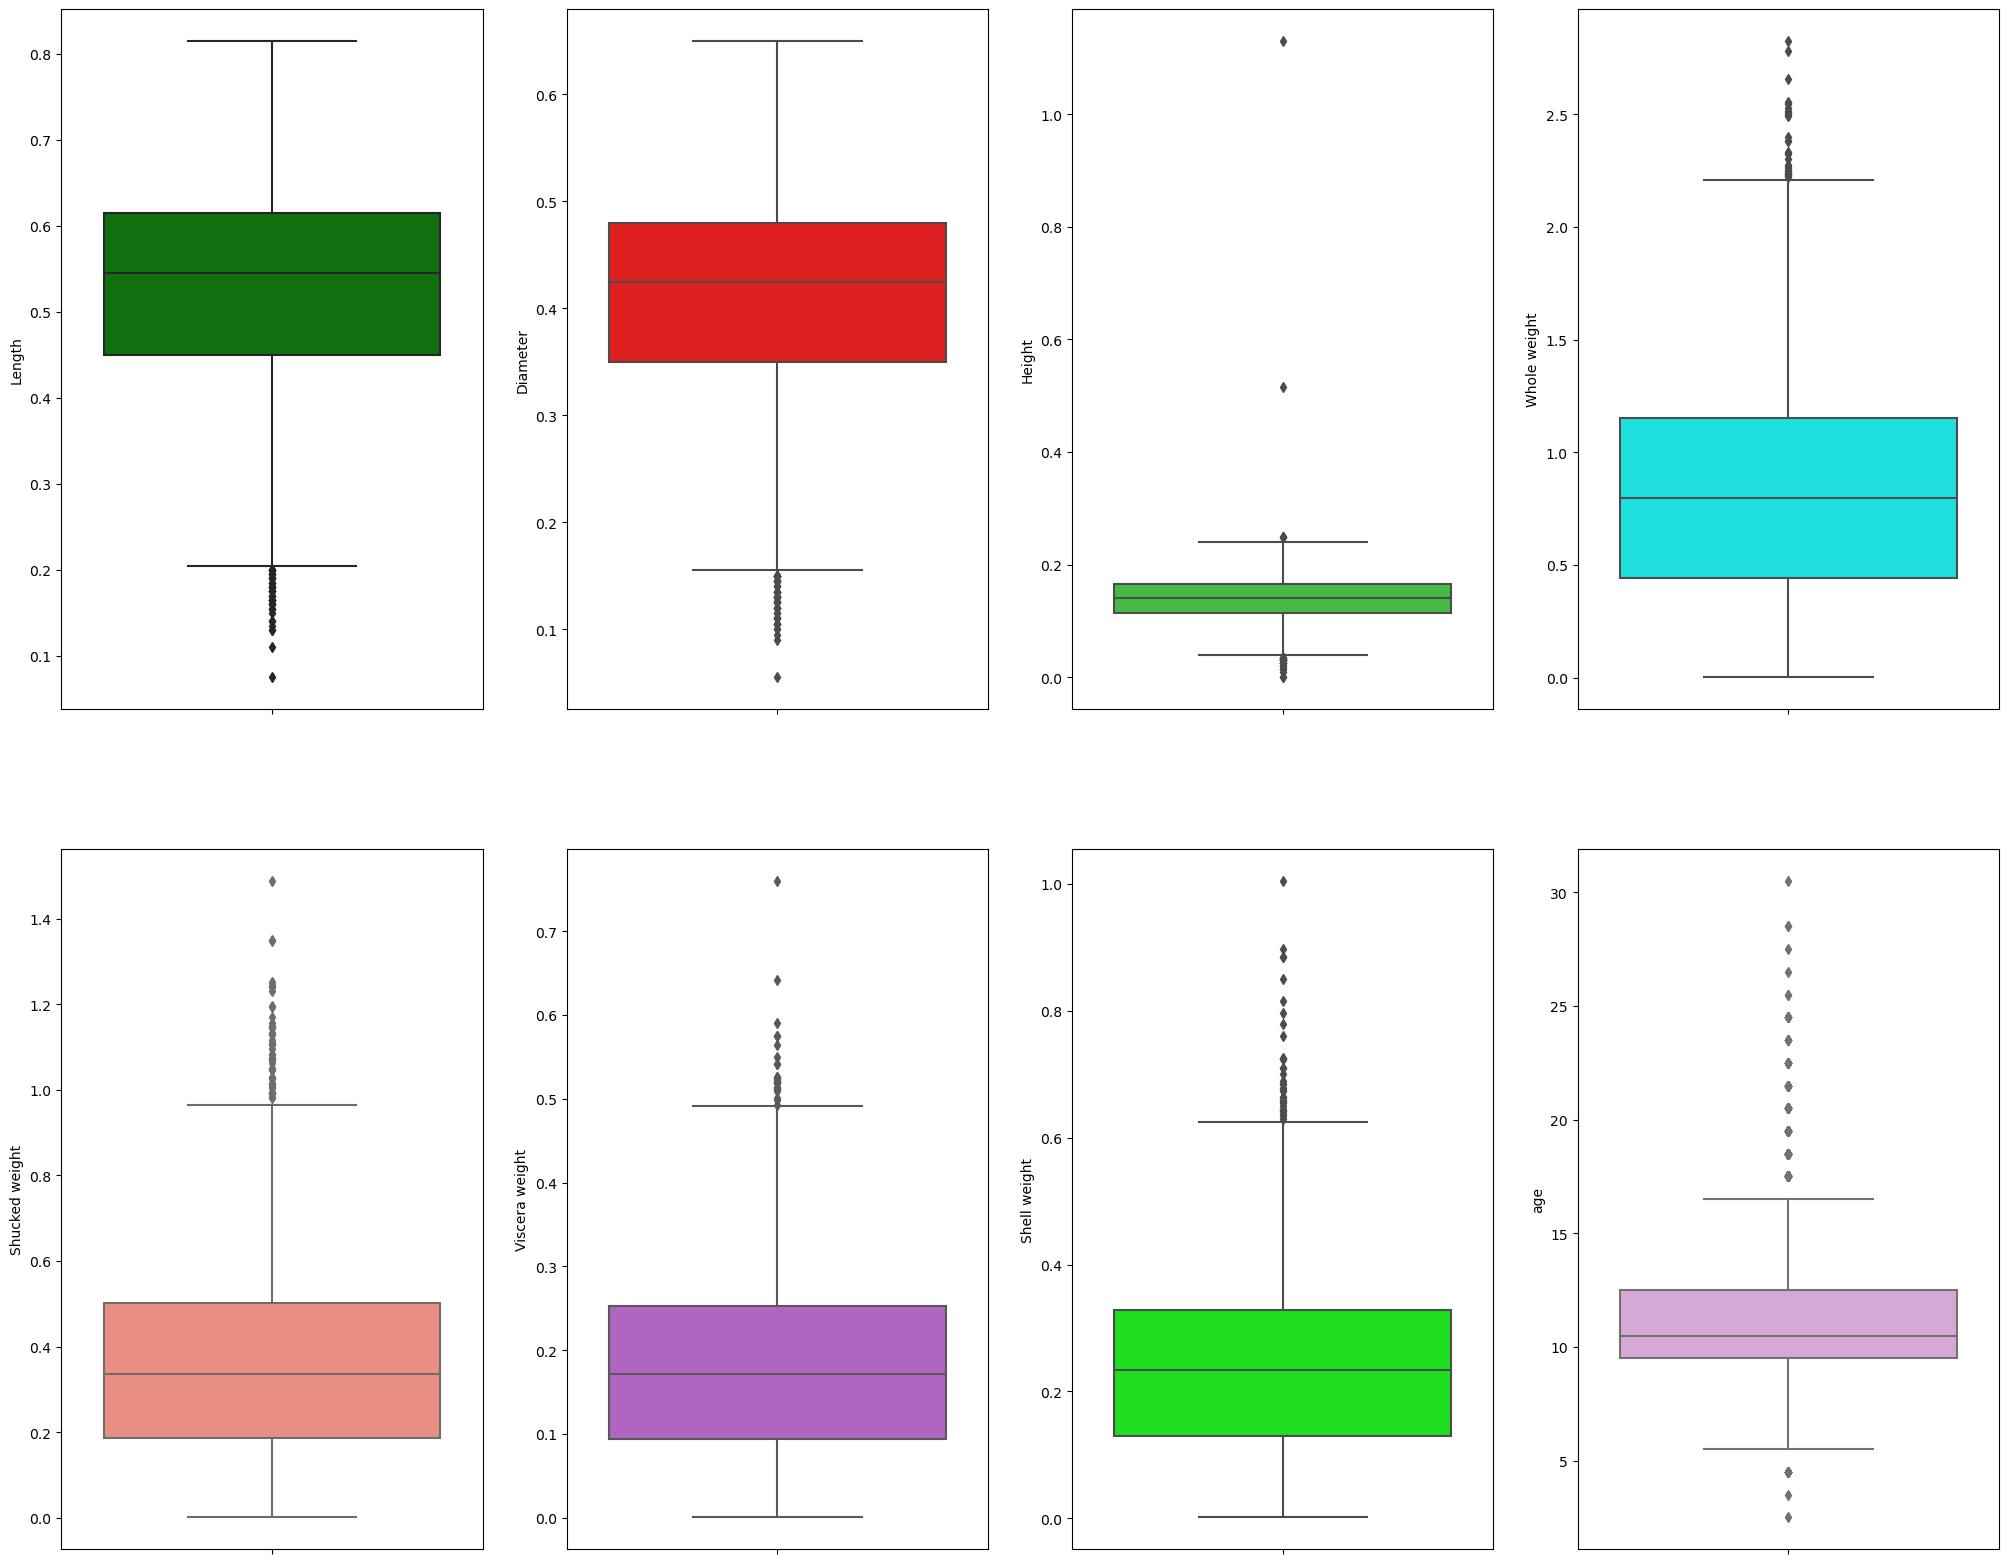

In [14]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows= 2, ncols = 4, figsize = (25,20))
sns.boxplot(ax = ax1, y = 'Length', data = a, color = 'green')
sns.boxplot(ax = ax2, y = 'Diameter', data = a, color = 'red')
sns.boxplot(ax = ax3, y = 'Height', data = a, color = 'limegreen')
sns.boxplot(ax = ax4, y = 'Whole weight', data = a, color = 'cyan')
sns.boxplot(ax = ax5, y = 'Shucked weight', data = a, color = 'salmon')
sns.boxplot(ax = ax6, y = 'Viscera weight', data = a, color = 'mediumorchid')
sns.boxplot(ax = ax7, y = 'Shell weight', data = a, color = 'lime')
sns.boxplot(ax = ax8, y = 'age', data = a, color = 'plum')

In [15]:
a1 = a.copy()
a2 = a.copy()
a3 = a.copy()

a_m = a1[a1['Sex'] == 'M']
a_m.drop('Sex', axis = 1, inplace= True)
a_f = a2[a2['Sex'] == 'F']
a_f.drop('Sex', axis = 1, inplace= True)
a_i = a3[a3['Sex'] == 'I']
a_i.drop('Sex', axis = 1, inplace= True)
a_m.drop(['age'], axis=1, inplace = True)
a_f.drop(['age'], axis=1, inplace = True)
a_i.drop(['age'], axis=1, inplace = True)

a_m = a_m.mean()
a_f = a_f.mean()
a_i = a_i.mean()
trace1 = go.Bar(x = a_m.index[::-1], y = a_m.values[::-1], name = 'M', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = a_f.index[::-1], y = a_f.values[::-1], name = 'F', marker = dict(color = 'violet'))
trace3 = go.Bar(x = a_i.index[::-1], y = a_i.values[::-1], name = 'I', marker = dict(color = 'lightsteelblue'))
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Feature Distribution', width = 800)
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

In [16]:
a1 = a.copy()
a2 = a.copy()
a3 = a.copy()

a_m = a1[a1['Sex'] == 'M']
a_m.drop('Sex', axis = 1, inplace= True)
a_f = a2[a2['Sex'] == 'F']
a_f.drop('Sex', axis = 1, inplace= True)
a_i = a3[a3['Sex'] == 'I']
a_i.drop('Sex', axis = 1, inplace= True)
a_m.drop(['Length','Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], axis=1, inplace = True)
a_f.drop(['Length','Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], axis=1, inplace = True)
a_i.drop(['Length','Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], axis=1, inplace = True)

a_m = a_m.mean()
a_f = a_f.mean()
a_i = a_i.mean()
          
trace1 = go.Bar(x = a_m.index[::-1], y = a_m.values[::-1], name = 'M', marker = dict(color = 'limegreen'))
trace2 = go.Bar(x = a_f.index[::-1], y = a_f.values[::-1], name = 'F', marker = dict(color = 'olive'))
trace3 = go.Bar(x = a_i.index[::-1], y = a_i.values[::-1], name = 'I', marker = dict(color = 'seagreen'))
data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Feature Distribution', width = 800)
fig = go.Figure(data = data, layout= layout)
py.iplot(fig)

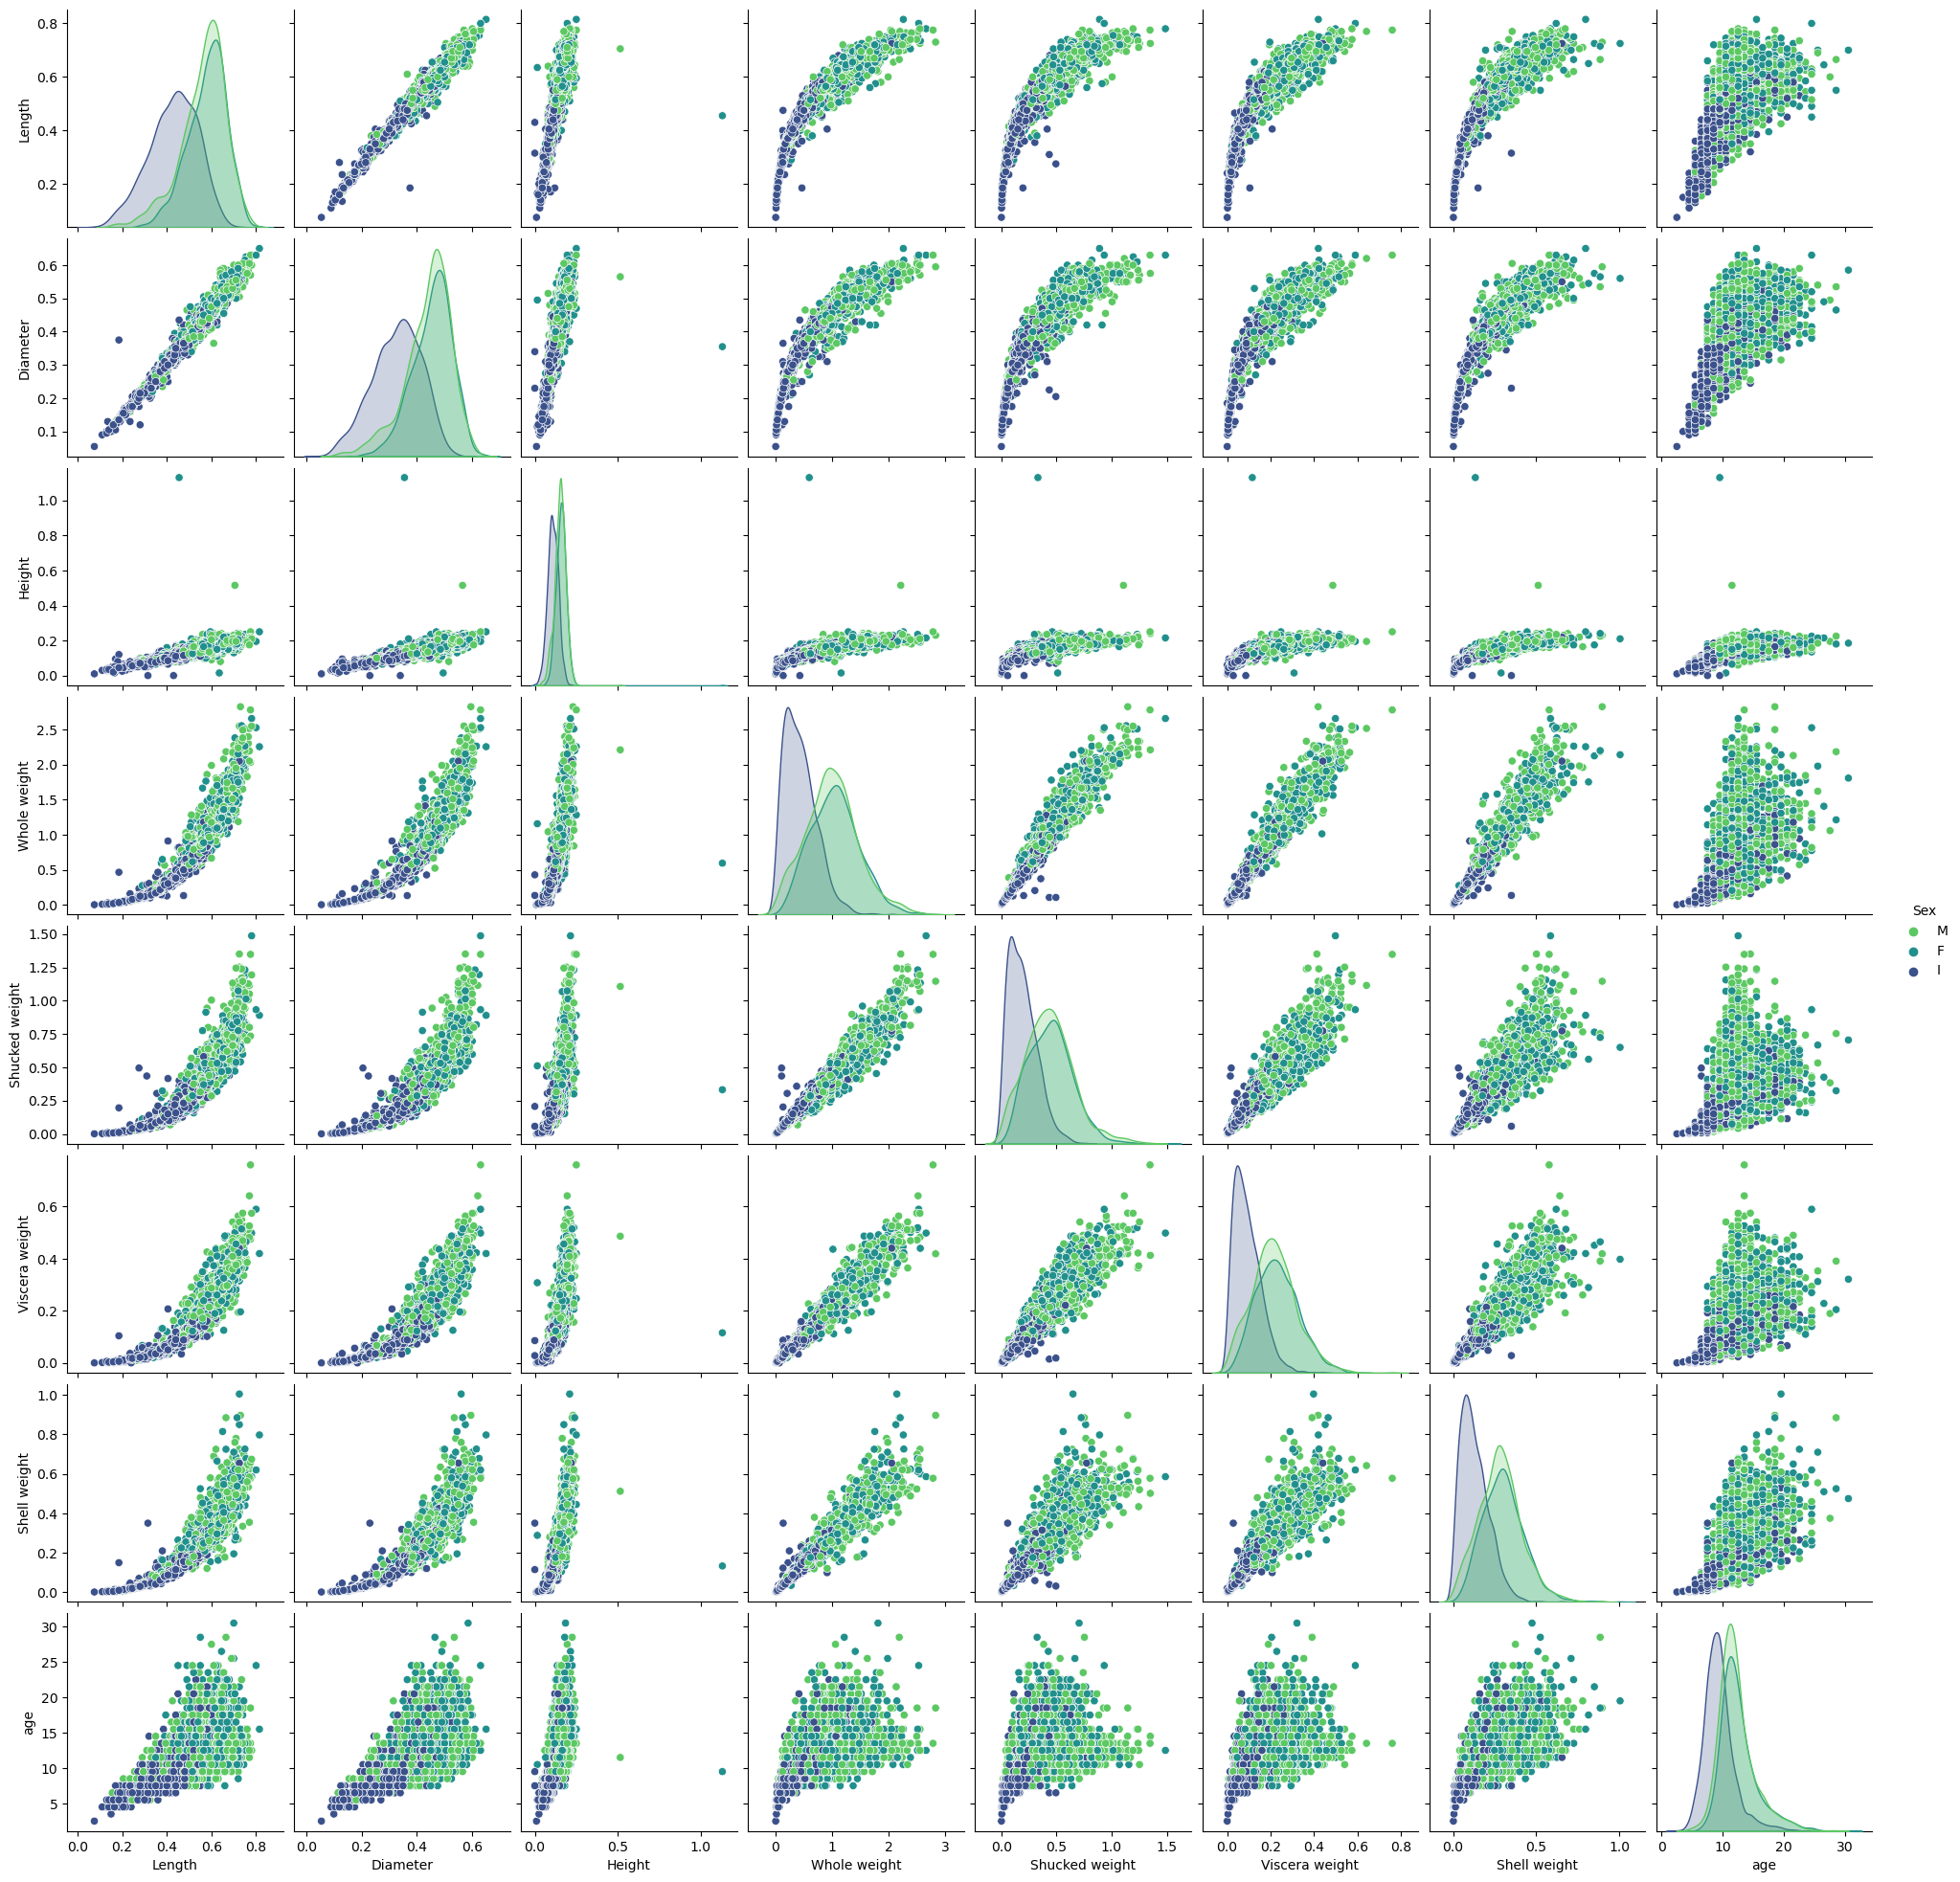

In [17]:
sns.pairplot(a,hue='Sex',palette='viridis_r')

In [18]:
a.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

<AxesSubplot:xlabel='Height', ylabel='Count'>

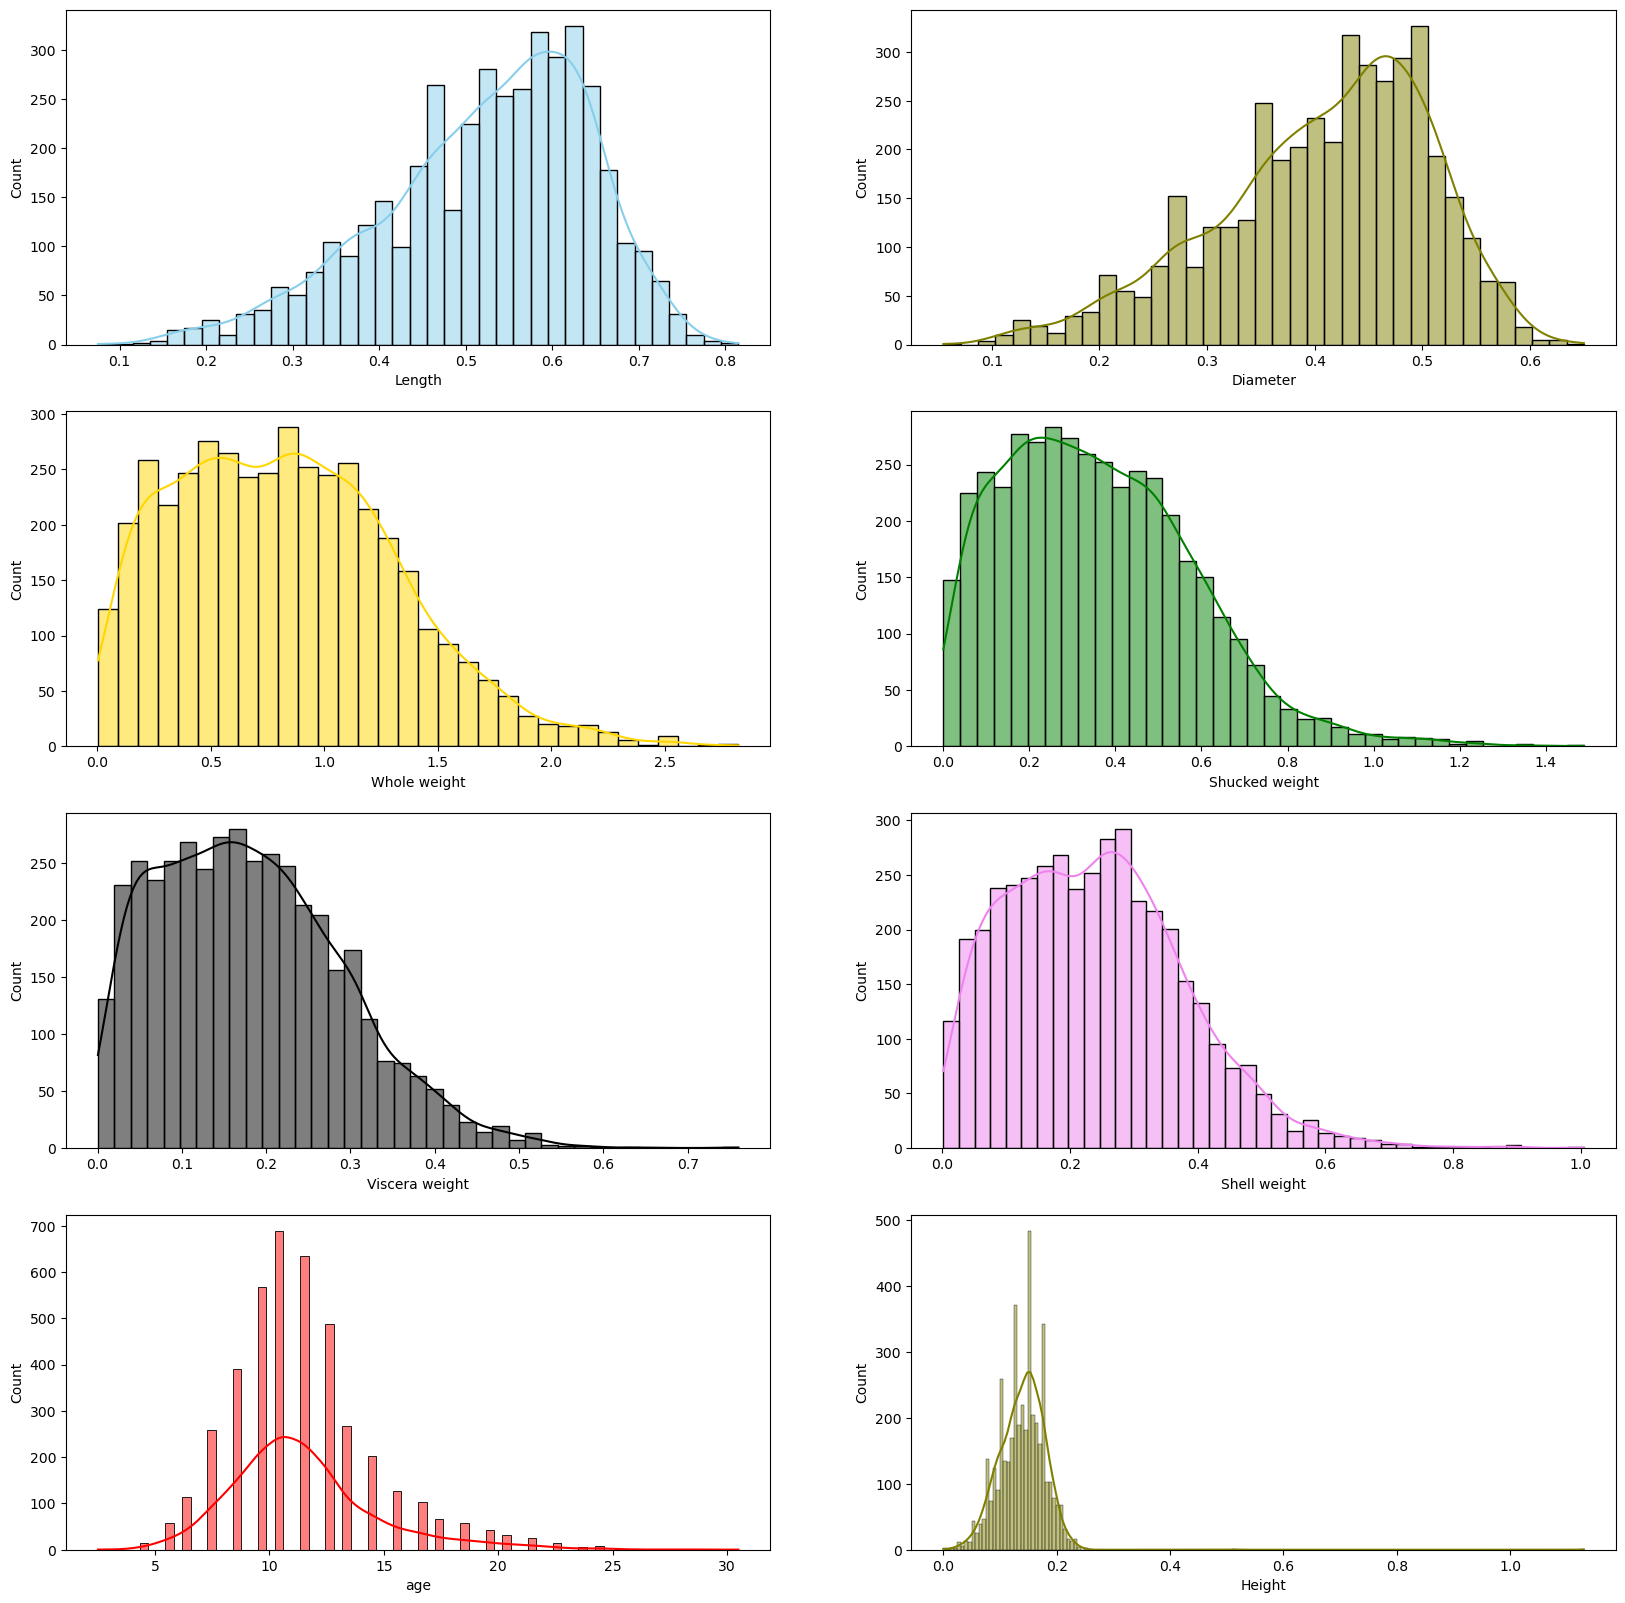

In [19]:
fig, axs = plt.subplots(4, 2, figsize=(20, 20))

sns.histplot(data=a['Length'], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a['Diameter'], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a['Whole weight'], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a['Shucked weight'], kde=True, color="green", ax=axs[1, 1])
sns.histplot(data=a['Viscera weight'], kde=True, color="black", ax=axs[2, 0])
sns.histplot(data=a['Shell weight'], kde=True, color="violet", ax=axs[2, 1])
sns.histplot(data=a['age'], kde=True, color="red", ax=axs[3, 0])
sns.histplot(data=a['Height'], kde=True, color="olive", ax=axs[3, 1])

Weight relation with age

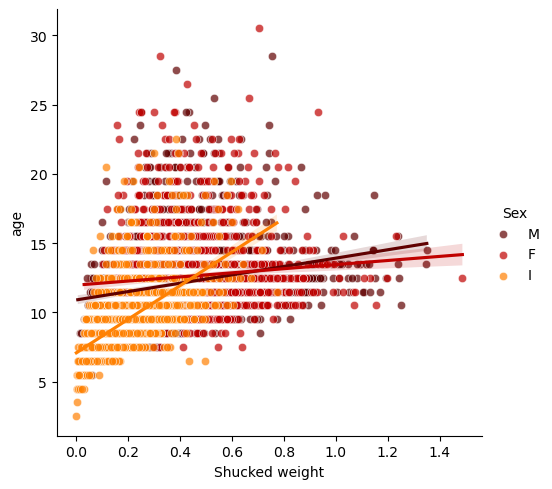

In [20]:
sns.lmplot(x = 'Shucked weight', y = 'age', data = a, hue = 'Sex', 
    palette = 'gist_heat', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

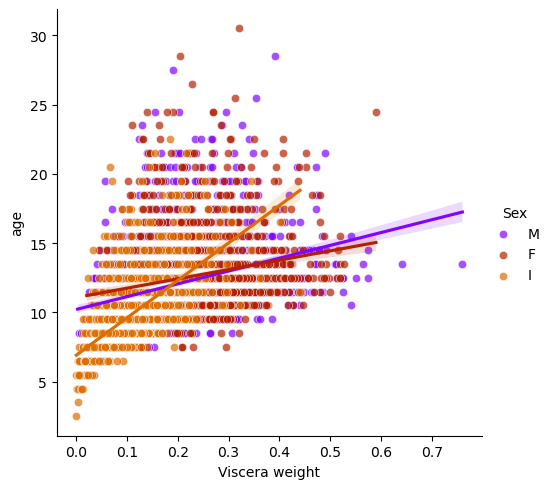

In [21]:
sns.lmplot(x = 'Viscera weight', y = 'age', data = a, hue = 'Sex', palette = 'gnuplot', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

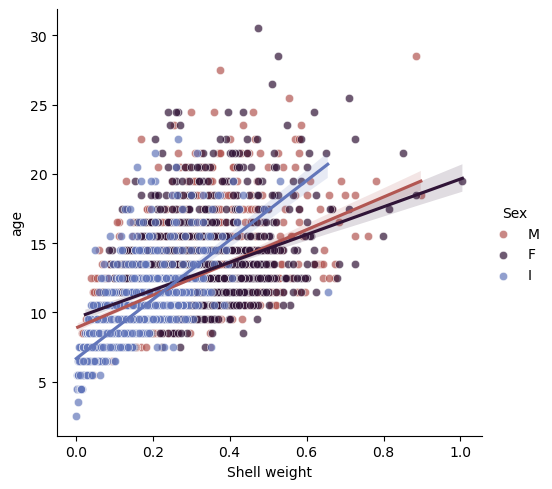

In [22]:
sns.lmplot(x = 'Shell weight', y = 'age', data = a, hue = 'Sex', palette = 'twilight_r', 
           scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidth':0.5})

<AxesSubplot:>

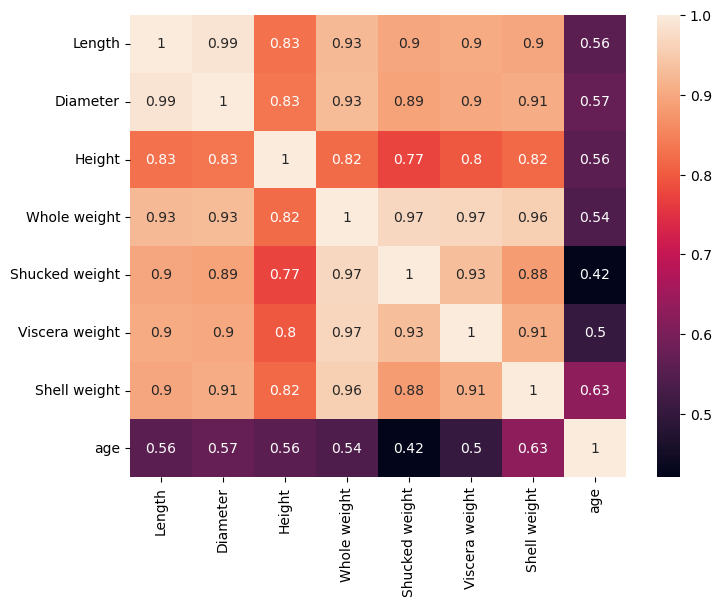

In [23]:
plt.figure(figsize = (8,6))
corr = a.corr()
sns.heatmap(corr, annot = True)

In [24]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cols=['Sex']
a[cols]=a[cols].apply(la.fit_transform)

In [25]:
# splitting x(inputs) and y(outputs)

x=a.drop(['age'],axis=1)
y=a["age"]
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [26]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 4177, dtype: float64

In [27]:
# Training and Testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [28]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2812,1.108856,2.510487,2.469161,2.244460,1.587043,1.508625,1.473444,1.570006
1344,0.879080,0.043467,-0.178692,-0.506794,0.210304,-1.198228,-0.250790,-0.134347
533,1.338631,1.116084,1.012842,0.809023,1.256199,0.991215,0.906794,0.993758
866,0.879080,-0.099549,-0.046300,-0.387174,0.520820,0.117869,-0.837677,-0.317283
3939,0.879080,0.257990,0.262617,-0.028315,0.758662,0.512003,-0.481497,0.140057
...,...,...,...,...,...,...,...,...
351,1.338631,0.043467,-0.002169,-0.626414,0.759679,0.425190,0.279432,0.018099
1747,1.338631,-0.778873,-0.752394,-0.746033,-0.159672,-0.783258,-2.282634,-1.457584
3752,1.108856,0.830053,0.836318,0.210925,1.157098,0.834951,0.874414,0.789479
2014,1.108856,0.865807,0.659795,0.928643,1.194197,0.999897,0.902747,0.780332


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [30]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_lr=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_lr)
mean_absolute_percentage_error_lr=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_lr)

Mean Absolute Error is 3.559993906577346
Mean Absolute Percentage Error is 0.3644321793354753
Mean Squared Error is 15.351697356693643
Root Mean Square Error is 3.9181242140460073
r2_score is  -0.50571706060453
Mean Absolute Percentage Error is 0.3644321793354753


In [31]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)
r2_score_tree=r2_score(y_test,y_pred)
print('r2_score is ',r2_score_tree)
mean_absolute_percentage_error_tree=mean_absolute_percentage_error(y_test,y_pred)
print('Mean Absolute Percentage Error is',mean_absolute_percentage_error_tree)

Mean Absolute Error is 3.007177033492823
Mean Squared Error is 15.73444976076555
Root Mean Square Error is 3.966667336791119
r2_score is  -0.5432579794624168
Mean Absolute Percentage Error is 0.2891038951671675


In [32]:
x = ['Linear Regression','Decision Tree']
y1 = [mean_absolute_percentage_error_lr,r2_score_lr]
y2 = [mean_absolute_percentage_error_tree,r2_score_tree]

trace1 = go.Bar(x = x, y = y1, name = 'Mean Absolute Percentage Error', marker = dict(color = 'cyan'))
trace2 = go.Bar(x = x, y = y2, name = 'Coefficient of determination', marker = dict(color = 'violet'))
data = [trace1,trace2]
layout = go.Layout(title = 'Percentage ', width = 750)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)